# Q2
## Preprocessing

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import random
import copy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


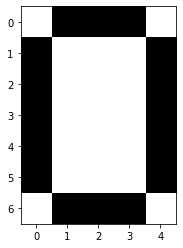

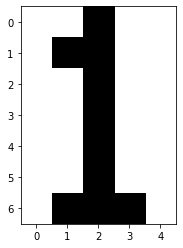

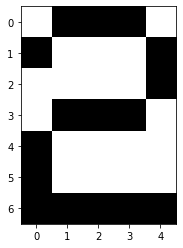

In [2]:
#reading images
im1 = Image.open('Images_Q2/Image_1.png', 'r')
im2 = Image.open('Images_Q2/Image_2.png', 'r')
im3 = Image.open('Images_Q2/Image_3.png', 'r')

def manage_image(pix_vals):
    for i in range(len(pix_vals)):
        pix_vals[i] = (pix_vals[i][0], pix_vals[i][1], pix_vals[i][2])

#getting data
pix_val1 = list(im1.getdata())
pix_val2 = list(im2.getdata())
manage_image(pix_val2)
pix_val3 = list(im3.getdata())
manage_image(pix_val3)

#function for assigning 1 to black and -1 to white
def rgb_to_num(vector_):
    vector = copy.deepcopy(vector_)
    result = np.zeros(shape=(35))
    for i in range(len(vector)):
        if vector[i] == (255,255,255):
            result[i] = -1
        elif vector[i] == (0,0,0):
            result[i] = 1
    return result

def num_to_rgb(vector_):
    vector = copy.deepcopy(vector_)
    result = np.zeros(shape=(35,3))
    for i in range(len(vector)):
        if vector[i] == -1:
            result[i] = (255,255,255)
        elif vector[i] == 1:
            result[i] = (0,0,0)
    return result

def show_image(vector_):
    vector = num_to_rgb(vector_)
    result = np.zeros(shape=(7,5,3))
    for i in range(7):
        for j in range(5):
            result[i][j] = vector[i*5+j]
    plt.figure()
    plt.imshow([list(i) for i in result])

im_vector_1 = rgb_to_num(pix_val1)
im_vector_2 = rgb_to_num(pix_val2)
im_vector_3 = rgb_to_num(pix_val3)

#displaying image
show_image(im_vector_1)
show_image(im_vector_2)
show_image(im_vector_3)

# Part 1
## Hebbian Learning Rule

In [3]:
weight_vector = np.zeros((len(im_vector_1),len(im_vector_1)))
def update_weight(im_vector_):
    for i in range(len(im_vector_)):
        for j in range(len(im_vector_)):
            weight_vector[i][j] += im_vector_[i]*im_vector_[j]
        
update_weight(im_vector_1)
update_weight(im_vector_2)
update_weight(im_vector_3)

weight_vector.shape

(35, 35)

In [4]:
print('Hebbian Learning Rule:\n', weight_vector)

Hebbian Learning Rule:
 [[ 3. -1. -3. ... -3. -3.  1.]
 [-1.  3.  1. ...  1.  1.  1.]
 [-3.  1.  3. ...  3.  3. -1.]
 ...
 [-3.  1.  3. ...  3.  3. -1.]
 [-3.  1.  3. ...  3.  3. -1.]
 [ 1.  1. -1. ... -1. -1.  3.]]


## Modified Hebbian Learning Rule

In [5]:
P = 3
weight_vector_modified = weight_vector - P*np.eye(len(im_vector_1), dtype=int)
print('Modified Hebbian Learning Rule:\n', weight_vector_modified)

Modified Hebbian Learning Rule:
 [[ 0. -1. -3. ... -3. -3.  1.]
 [-1.  0.  1. ...  1.  1.  1.]
 [-3.  1.  0. ...  3.  3. -1.]
 ...
 [-3.  1.  3. ...  0.  3. -1.]
 [-3.  1.  3. ...  3.  0. -1.]
 [ 1.  1. -1. ... -1. -1.  0.]]


# Part 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 1:
First image is the predicted one and second is the real one
Predicted Correctly


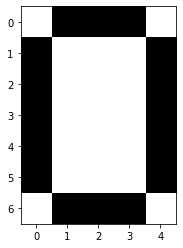

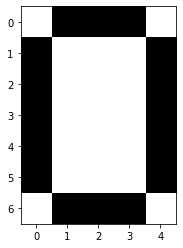

In [6]:
def my_sign(x):
    if x>=0:
        return 1
    else:
        return -1
    
def predict(input_):
    input__ = copy.deepcopy(input_)
    ans = np.matmul(np.transpose(input__), weight_vector)
    for i in range(len(ans)):
        ans[i] = my_sign(ans[i])
    return ans
# print('real image:')
# show_image(im_vector_2)
# show_image(im_vector_3)

print('Image 1:')
ans = predict(im_vector_1)
print('First image is the predicted one and second is the real one')
show_image(ans)
show_image(im_vector_1)
if list(ans) == list(im_vector_1):
    print('Predicted Correctly')
else:
    print('Predicted Wrong')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 2:
First image is the predicted one and second is the real one
Predicted Correctly


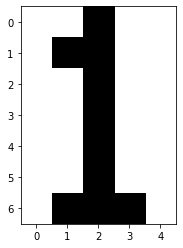

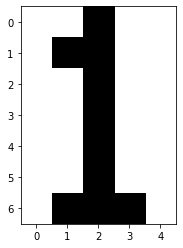

In [7]:
print('Image 2:')
ans = predict(im_vector_2)
print('First image is the predicted one and second is the real one')
show_image(ans)
show_image(im_vector_2)
if list(ans) == list(im_vector_2):
    print('Predicted Correctly')
else:
    print('Predicted Wrong')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 3:
First image is the predicted one and second is the real one
Predicted Correctly


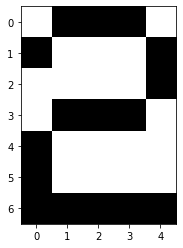

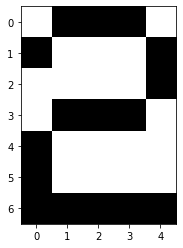

In [8]:
print('Image 3:')
ans = predict(im_vector_3)
print('First image is the predicted one and second is the real one')
show_image(ans)
show_image(im_vector_3)
if list(ans) == list(im_vector_3):
    print('Predicted Correctly')
else:
    print('Predicted Wrong')

# Part 3
### Adding noise to inputs

In [9]:
def add_noise(im_vector__, noise):
    im_vector_ = copy.deepcopy(im_vector__)
    for i in range(len(im_vector_)):
        rand = random.random()
        if rand < noise:
            im_vector_[i] *= -1
    return im_vector_

def reset_inputs():
    im_vector_1 = rgb_to_num(pix_val1)
    im_vector_2 = rgb_to_num(pix_val2)
    im_vector_3 = rgb_to_num(pix_val3)
    return im_vector_1, im_vector_2, im_vector_3

In [10]:
#1
noises = [0.2, 0.8]
print('First Image:')
for noise in noises:
    winning_num = 0
    for _ in range(10000):
        im_vector_1, im_vector_2, im_vector_3 = reset_inputs()
        added_noise = add_noise(im_vector_1, noise)
        ans = predict(added_noise)
        if list(ans) == list(im_vector_1):
            winning_num += 1
    print('Noise:', noise*100, '%')
    print('Accuracy:', winning_num/100,'%')
    print('')

First Image:
Noise: 20.0 %
Accuracy: 90.26 %

Noise: 80.0 %
Accuracy: 0.0 %



In [11]:
#2
print('Second Image:')
for noise in noises:
    winning_num = 0
    for _ in range(10000):
        im_vector_1, im_vector_2, im_vector_3 = reset_inputs()
        added_noise = add_noise(im_vector_2, noise)
        ans = predict(added_noise)
        if list(ans) == list(im_vector_2):
            winning_num += 1
    print('Noise:', noise*100, '%')
    print('Accuracy:', winning_num/100,'%')
    print('')

Second Image:
Noise: 20.0 %
Accuracy: 95.75 %

Noise: 80.0 %
Accuracy: 0.0 %



In [12]:
#3
print('Third Image:')
for noise in noises:
    winning_num = 0
    for _ in range(10000):
        im_vector_1, im_vector_2, im_vector_3 = reset_inputs()
        added_noise = add_noise(im_vector_3, noise)
        ans = predict(added_noise)
        if list(ans) == list(im_vector_3):
            winning_num += 1
    print('Noise:', noise*100, '%')
    print('Accuracy:', winning_num/100,'%')
    print('')

Third Image:
Noise: 20.0 %
Accuracy: 89.85 %

Noise: 80.0 %
Accuracy: 0.0 %



# Part 4
### Removing Data

In [13]:
def remove_data(im_vector__, noise):
    im_vector_ = copy.deepcopy(im_vector__)
    for i in range(len(im_vector_)):
        rand = random.random()
        if rand < noise:
            im_vector_[i] = 0
    return im_vector_

In [15]:
#1
noises = [0.2, 0.8]
print('First Image:')
for noise in noises:
    winning_num = 0
    for _ in range(10000):
        im_vector_1, im_vector_2, im_vector_3 = reset_inputs()
        added_noise = remove_data(im_vector_1, noise)
        ans = predict(added_noise)
        if list(ans) == list(im_vector_1):
            winning_num += 1
    print('Noise:', noise*100, '%')
    print('Accuracy:', winning_num/100,'%')
    print('')

First Image:
Noise: 20.0 %
Accuracy: 99.98 %

Noise: 80.0 %
Accuracy: 69.88 %



In [18]:
#2
print('Second Image:')
for noise in noises:
    winning_num = 0
    for _ in range(10000):
        im_vector_1, im_vector_2, im_vector_3 = reset_inputs()
        added_noise = remove_data(im_vector_2, noise)
        ans = predict(added_noise)
        if list(ans) == list(im_vector_2):
            winning_num += 1
    print('Noise:', noise*100, '%')
    print('Accuracy:', winning_num/100,'%')
    print('')

Second Image:
Noise: 20.0 %
Accuracy: 100.0 %

Noise: 80.0 %
Accuracy: 83.79 %



In [19]:
#3
print('Third Image:')
for noise in noises:
    winning_num = 0
    for _ in range(10000):
        im_vector_1, im_vector_2, im_vector_3 = reset_inputs()
        added_noise = remove_data(im_vector_3, noise)
        ans = predict(added_noise)
        if list(ans) == list(im_vector_3):
            winning_num += 1
    print('Noise:', noise*100, '%')
    print('Accuracy:', winning_num/100,'%')
    print('')

Third Image:
Noise: 20.0 %
Accuracy: 99.97 %

Noise: 80.0 %
Accuracy: 74.57 %

